<a href="https://colab.research.google.com/github/sasansharee/Sasan_MMA_Assisgnments/blob/main/Clustering_World_military_power_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1030]:
!pip install pyclustertend

In [1031]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1032]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [1033]:
df = pd.read_excel('/content/World military power.xlsx')

In [1034]:
df.shape

(138, 60)

In [1035]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    int64  
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    int64  
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    int64  
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    int64  
 10  Trainer Aircraft Fleet                   138 non-n

In [1036]:
df.describe()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,Airport Totals value,Total Border Coverage value
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,124.000000,115.000000,115.000000,115.000000,115.000000,138.000000,129.000000
mean,1.460716,388.471014,81.565217,25.760870,30.231884,82.833333,154.065217,25.623188,646.565217,2485.695652,212.159420,393.978261,156.934783,84.983871,0.382609,4.800000,2.052174,3.521739,290.043478,3964.224806
std,1.324018,1231.981859,230.324777,94.528222,92.330436,240.803721,520.183631,97.326091,1515.463683,5410.546392,688.028987,805.781703,484.380984,146.114165,1.971653,13.706958,10.000740,6.481211,1212.967393,3760.099671
min,0.060600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,29.000000
25%,0.574800,33.000000,0.000000,0.000000,3.000000,4.250000,15.250000,0.000000,19.250000,250.250000,0.000000,24.250000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,33.500000,1587.000000
50%,1.034100,111.000000,17.000000,0.000000,9.000000,26.000000,44.000000,2.000000,153.000000,734.500000,23.000000,108.000000,24.000000,38.000000,0.000000,0.000000,0.000000,0.000000,68.000000,2816.000000
75%,2.021525,290.250000,60.500000,15.750000,26.000000,79.250000,126.750000,17.750000,436.250000,2000.000000,97.250000,296.500000,99.750000,77.750000,0.000000,4.000000,0.000000,5.500000,150.750000,5267.000000
max,10.168100,13264.000000,2085.000000,742.000000,945.000000,2643.000000,5768.000000,967.000000,12950.000000,39253.000000,6083.000000,4465.000000,3860.000000,984.000000,20.000000,83.000000,91.000000,52.000000,13513.000000,22457.000000


In [1037]:
df.head(20)

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.0
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691.0
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734.0
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369.0
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,Argentina,64,Argentina,100,Argentina,0,Argentina,370,Argentina,739,Argentina,83,Argentina,172,Argentina,26,Argentina,49.0,Argentina,0.0,Argentina,2.0,Argentina,4.0,Argentina,0.0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968.0
5,Armenia,2.1251,Armenia,64,Armenia,0,Armenia,9,Armenia,3,Armenia,13,Armenia,37,Armenia,20,Armenia,110,Armenia,748,Armenia,38,Armenia,150,Armenia,68,Armen

In [1038]:
country_cols = df.columns[::2]
country_cols

Index(['Military Strength', 'Aircraft Strength',
       'Fighter/Interceptor Strength', 'Attack Aircraft Strength',
       'Transport Aircraft Fleet Strength', 'Trainer Aircraft Fleet',
       'Helicopter Fleet Strength', 'Attack Helicopter Fleet Strength',
       'Tank Strength', 'AFV/APC Strength',
       'Self-Propelled Artillery Strength', 'Towed Artillery Strength',
       'Rocket Projector Strength', 'Navy Fleet Strengths',
       'Aircraft Carrier Fleet Strength', 'Submarine Fleet Strength',
       'Destroyer Fleet Strength', 'Frigate Fleet Strength',
       'defense spending budget', 'External Debt', 'Airport Totals',
       'Oil Production', 'Oil Consumption', 'Proven Oil Reserves',
       'Available Manpower', 'Total Population', 'Total Square Land Area',
       'Total Coastline Coverage', 'Total Waterway Coverage',
       'Total Border Coverage'],
      dtype='object')

In [1039]:
mismatch = []
for col in country_cols:
  if not df['Military Strength'].equals(df[col]):
    mismatch.append(col)
mismatch

['Navy Fleet Strengths',
 'Aircraft Carrier Fleet Strength',
 'Submarine Fleet Strength',
 'Destroyer Fleet Strength',
 'Frigate Fleet Strength',
 'Total Coastline Coverage',
 'Total Border Coverage']

In [1040]:
df[df['Military Strength'] != df['Navy Fleet Strengths']][['Military Strength', 'Navy Fleet Strengths', 'Navy Fleet Strengths value']]

,Military Strength,Navy Fleet Strengths,Navy Fleet Strengths value
16,Botswana,NaN,NaN
19,Burkina Faso,NaN,NaN
23,Central African Republic,NaN,NaN
24,Chad,NaN,NaN
30,Czechia,NaN,NaN
38,Ethiopia,NaN,NaN
48,Hungary,NaN,NaN
62,Kyrgyzstan,NaN,NaN
71,Mali,NaN,NaN
74,Moldova,NaN,NaN


In [1041]:
df[df['Military Strength'] != df['Aircraft Carrier Fleet Strength']][['Military Strength', 'Aircraft Carrier Fleet Strength', 'Aircraft Carrier Fleet Strength value']]

,Military Strength,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value
5,Armenia,NaN,NaN
7,Austria,NaN,NaN
11,Belarus,NaN,NaN
13,Bhutan,NaN,NaN
16,Botswana,NaN,NaN
19,Burkina Faso,NaN,NaN
23,Central African Republic,NaN,NaN
24,Chad,NaN,NaN
30,Czechia,NaN,NaN
38,Ethiopia,NaN,NaN


In [1042]:
df[df['Military Strength'] != df['Submarine Fleet Strength']][['Military Strength', 'Submarine Fleet Strength', 'Submarine Fleet Strength value']]

,Military Strength,Submarine Fleet Strength,Submarine Fleet Strength value
5,Armenia,NaN,NaN
7,Austria,NaN,NaN
11,Belarus,NaN,NaN
13,Bhutan,NaN,NaN
16,Botswana,NaN,NaN
19,Burkina Faso,NaN,NaN
23,Central African Republic,NaN,NaN
24,Chad,NaN,NaN
30,Czechia,NaN,NaN
38,Ethiopia,NaN,NaN


In [1043]:
df[df['Military Strength'] != df['Destroyer Fleet Strength']][['Military Strength', 'Destroyer Fleet Strength', 'Destroyer Fleet Strength value']]

,Military Strength,Destroyer Fleet Strength,Destroyer Fleet Strength value
5,Armenia,NaN,NaN
7,Austria,NaN,NaN
11,Belarus,NaN,NaN
13,Bhutan,NaN,NaN
16,Botswana,NaN,NaN
19,Burkina Faso,NaN,NaN
23,Central African Republic,NaN,NaN
24,Chad,NaN,NaN
30,Czechia,NaN,NaN
38,Ethiopia,NaN,NaN


In [1044]:
df[df['Military Strength'] != df['Frigate Fleet Strength']][['Military Strength', 'Frigate Fleet Strength', 'Frigate Fleet Strength value']]

,Military Strength,Frigate Fleet Strength,Frigate Fleet Strength value
5,Armenia,NaN,NaN
7,Austria,NaN,NaN
11,Belarus,NaN,NaN
13,Bhutan,NaN,NaN
16,Botswana,NaN,NaN
19,Burkina Faso,NaN,NaN
23,Central African Republic,NaN,NaN
24,Chad,NaN,NaN
30,Czechia,NaN,NaN
38,Ethiopia,NaN,NaN


In [1045]:
df[df['Military Strength'] != df['Total Coastline Coverage']][['Military Strength', 'Total Coastline Coverage', 'Total Coastline Coverage value']]

,Military Strength,Total Coastline Coverage,Total Coastline Coverage value
5,Armenia,NaN,NaN
7,Austria,NaN,NaN
11,Belarus,NaN,NaN
13,Bhutan,NaN,NaN
14,Bolivia,NaN,NaN
16,Botswana,NaN,NaN
19,Burkina Faso,NaN,NaN
23,Central African Republic,NaN,NaN
24,Chad,NaN,NaN
30,Czechia,NaN,NaN


In [1046]:
df[df['Military Strength'] != df['Total Border Coverage']][['Military Strength', 'Total Border Coverage', 'Total Border Coverage value']]

,Military Strength,Total Border Coverage,Total Border Coverage value
6,Australia,NaN,NaN
9,Bahrain,NaN,NaN
57,Japan,NaN,NaN
69,Madagascar,NaN,NaN
83,New Zealand,NaN,NaN
95,Philippines,NaN,NaN
105,Singapore,NaN,NaN
113,Sri Lanka,NaN,NaN
119,Taiwan,NaN,NaN


In [1047]:
df['Country'] = df[country_cols[0]]

In [1048]:
df = df.drop(country_cols, axis =1)

In [1049]:
df.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,Country
0,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0.0,0.0,0.0,0.0,0.0,"12,00,00,00,000","2,84,00,00,000",43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987.0,Afghanistan
1,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.0,0.0,0.0,0.0,0.0,"25,00,00,000","9,50,50,00,000",4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691.0,Albania
2,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201.0,0.0,6.0,0.0,5.0,"13,00,00,00,000","6,26,00,00,000",157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734.0,Algeria
3,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.0,0.0,0.0,0.0,0.0,"7,00,00,00,000","42,08,00,00,000",176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369.0,Angola
4,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.0,0.0,2.0,4.0,0.0,"4,20,00,00,000","2,14,90,00,00,000",1138,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000,11968.0,Argentina


In [1050]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   Aircraft Strength value                  138 non-null    int64  
 2   Fighter/Interceptor Strength value       138 non-null    int64  
 3   Attack Aircraft Strength value           138 non-null    int64  
 4   Transport Aircraft Fleet Strength value  138 non-null    int64  
 5   Trainer Aircraft Fleet value             138 non-null    int64  
 6   Helicopter Fleet Strength value          138 non-null    int64  
 7   Attack Helicopter Fleet Strength value   138 non-null    int64  
 8   Tank Strength value                      138 non-null    int64  
 9   AFV/APC Strength value                   138 non-null    int64  
 10  Self-Propelled Artillery Strength value  138 non-n

In [1051]:
df['defense spending budget value'] = df['defense spending budget value'].str.replace(',', '').astype(float)

In [1052]:
df['External Debt value'] = df['External Debt value'].str.replace(',', '').astype(float)

In [1053]:
df['Oil Production value'] = df['Oil Production value'].str.replace(',', '').astype(float)

In [1054]:
df['Oil Consumption value'] = df['Oil Consumption value'].str.replace(',', '').astype(float)

In [1055]:
df['Proven Oil Reserves value'] = df['Proven Oil Reserves value'].str.replace(',', '').astype(float)

In [1056]:
df['Available Manpower value'] = df['Available Manpower value'].str.replace(',', '').astype(float)

In [1057]:
df['Total Population value'] = df['Total Population value'].str.replace(',', '').astype(float)

In [1058]:
df['Total Square Land Area value'] = df['Total Square Land Area value'].str.replace(',', '').astype(float)

In [1059]:
df['Total Coastline Coverage value'] = df['Total Coastline Coverage value'].str.replace(',', '').astype(float)

In [1060]:
df['Total Waterway Coverage value'] = df['Total Waterway Coverage value'].str.replace(',', '').astype(float)

In [1061]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   Aircraft Strength value                  138 non-null    int64  
 2   Fighter/Interceptor Strength value       138 non-null    int64  
 3   Attack Aircraft Strength value           138 non-null    int64  
 4   Transport Aircraft Fleet Strength value  138 non-null    int64  
 5   Trainer Aircraft Fleet value             138 non-null    int64  
 6   Helicopter Fleet Strength value          138 non-null    int64  
 7   Attack Helicopter Fleet Strength value   138 non-null    int64  
 8   Tank Strength value                      138 non-null    int64  
 9   AFV/APC Strength value                   138 non-null    int64  
 10  Self-Propelled Artillery Strength value  138 non-n

In [1062]:
int_cols = df.select_dtypes(include='int').columns
df[int_cols] = df[int_cols].astype(float)

In [1063]:
df = df.drop(['Oil Production value', 'Oil Consumption value', 'Proven Oil Reserves value', 'Total Square Land Area value',
              'Total Coastline Coverage value', 'Total Waterway Coverage value'], axis = 1)

In [1064]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   Aircraft Strength value                  138 non-null    float64
 2   Fighter/Interceptor Strength value       138 non-null    float64
 3   Attack Aircraft Strength value           138 non-null    float64
 4   Transport Aircraft Fleet Strength value  138 non-null    float64
 5   Trainer Aircraft Fleet value             138 non-null    float64
 6   Helicopter Fleet Strength value          138 non-null    float64
 7   Attack Helicopter Fleet Strength value   138 non-null    float64
 8   Tank Strength value                      138 non-null    float64
 9   AFV/APC Strength value                   138 non-null    float64
 10  Self-Propelled Artillery Strength value  138 non-n

In [1065]:
df = df.dropna()

In [1066]:
X = df.drop('Country', axis = 1)

In [1067]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [1068]:
scaler = StandardScaler()

In [1069]:
scaler.fit(X)

StandardScaler()

In [1070]:
X_scaled = scaler.transform(X)

In [1071]:
k_means_model = KMeans(n_clusters = 5, random_state = 0)

In [1072]:
k_means_model.fit(X_scaled)

KMeans(n_clusters=5, random_state=0)

In [1073]:
k_means_model.fit_predict(X_scaled)

array([3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 2, 0, 3, 3, 3, 3,
       3, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 2, 0, 0, 3, 3, 0, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0,
       3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 4, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 1, 3, 3, 0, 3, 3, 3], dtype=int32)

In [1074]:
from pyclustertend import hopkins

In [1075]:
X_scaled.shape

(106, 24)

In [1076]:
hopkins(X_scaled, X_scaled.shape[0])

np.float64(0.08786612703764973)

In [1077]:
ssd = []
cluster_range = range(2, 10)
for i in cluster_range:
  model = KMeans(n_clusters = i, random_state = 0)
  model.fit(X_scaled)
  ssd.append(model.inertia_)

In [1078]:
ssd

[1477.5289657467488,
 790.0198727538902,
 639.3726822309728,
 492.1307299765571,
 411.58352622213016,
 370.16417010029846,
 297.27226477879765,
 235.03957019170488]

Text(0.5, 1.0, 'Elbow Method')

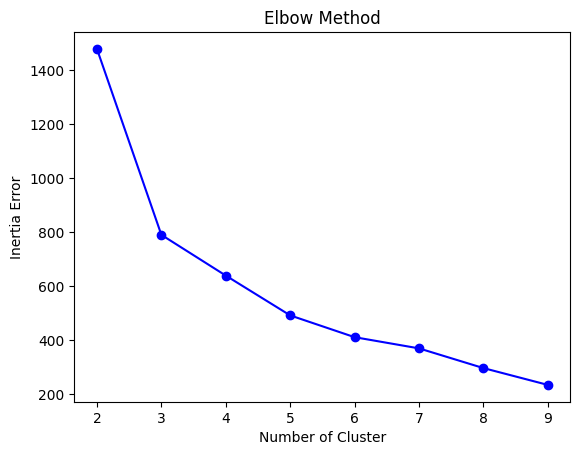

In [1079]:
plt.plot(cluster_range, ssd, 'bo-')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia Error')
plt.title('Elbow Method')

In [1080]:
pd.Series(ssd).diff()

,0
0,NaN
1,-687.509093
2,-150.647191
3,-147.241952
4,-80.547204
5,-41.419356
6,-72.891905
7,-62.232695


In [1081]:
df_diff = pd.DataFrame(-pd.Series(ssd).diff())
df_diff

,0
0,NaN
1,687.509093
2,150.647191
3,147.241952
4,80.547204
5,41.419356
6,72.891905
7,62.232695


In [1082]:
df_diff = df_diff.rename(index = lambda x: x + 1)
df_diff

,0
1,NaN
2,687.509093
3,150.647191
4,147.241952
5,80.547204
6,41.419356
7,72.891905
8,62.232695


<Axes: >

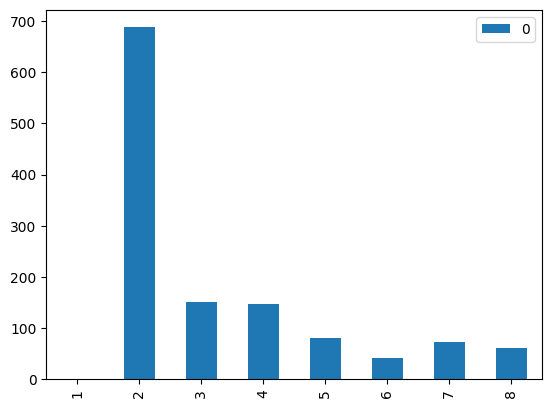

In [1083]:
df_diff.plot(kind = 'bar')

In [1084]:
from sklearn.metrics import silhouette_score

In [1085]:
silhouette_score(X_scaled, k_means_model.labels_)

np.float64(0.3997498979021272)

In [1086]:
for i in cluster_range:
  model = KMeans(n_clusters = i, random_state = 0)
  model.fit(X_scaled)
  cluster_labels = model.labels_

  silhouette_avg = silhouette_score(X, cluster_labels)
  print(f'For number_of_clusters: {i}, the silhouetter_score is: {silhouette_avg}')
  print(cluster_labels)

For number_of_clusters: 2, the silhouetter_score is: 0.9434531086143482
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
For number_of_clusters: 3, the silhouetter_score is: 0.34978307244406304
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
For number_of_clusters: 4, the silhouetter_score is: 0.3583211406212885
[3 3 0 3 3 3 3 3 3 3 0 3 3 3 0 3 2 0 3 3 3 3 3 3 0 3 3 3 0 3 3 0 3 0 3 3 2
 0 0 3 3 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 0 3 3 3 3 0 3 3 0 3 3 3 3 3
 3 3 3 2 0 3 3 3 3 3 3 0 3 3 3 0 3 0 3 0 3 3 0 3 0 1 3 3 0 3 3 3]
For number_of_clusters: 5, the silhouetter_score is: 0.20068609844462498
[3 3 0 3 3 3 3 3 3 3 0 3 3 3 0 3 2 0 3 3 3 3 3 3 0 3 3 3 0 3 3

**Building the model based on the optimal number of clusters**

In [1087]:
model = KMeans(n_clusters = 4, random_state = 0)

In [1088]:
model.fit(X_scaled)

KMeans(n_clusters=4, random_state=0)

In [1089]:
clusters = model.labels_

In [1090]:
X['predicted_clusters'] = clusters

In [1091]:
df['predicted_clusters'] = clusters

In [1092]:
df_sorted = df.sort_values(by = 'predicted_clusters')

In [1093]:
df_sorted

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Available Manpower value,Total Population value,Total Border Coverage value,Country,predicted_clusters
2,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157.0,20741263.0,4.165749e+07,6734.0,Algeria,0
17,0.1988,715.0,43.0,78.0,126.0,198.0,242.0,12.0,437.0,1820.0,132.0,565.0,84.0,112.0,0.0,6.0,0.0,7.0,2.780000e+10,5.474000e+11,4093.0,107764996.0,2.088469e+08,16145.0,Brazil,0
22,0.3712,385.0,62.0,0.0,38.0,135.0,145.0,0.0,80.0,1973.0,0.0,133.0,0.0,64.0,0.0,4.0,0.0,12.0,2.250000e+10,1.608000e+12,1467.0,16110865.0,3.588166e+07,8893.0,Canada,0
27,0.6045,469.0,21.0,38.0,76.0,80.0,224.0,0.0,0.0,595.0,6.0,110.0,0.0,453.0,0.0,11.0,0.0,4.0,1.060000e+10,1.246000e+11,836.0,24084498.0,4.816900e+07,6672.0,Colombia,0
35,0.1872,1054.0,215.0,88.0,59.0,387.0,294.0,81.0,4295.0,11700.0,1139.0,2189.0,1084.0,316.0,2.0,8.0,0.0,7.0,1.120000e+10,7.747000e+10,83.0,42946553.0,9.941332e+07,2612.0,Egypt,0
40,0.1702,1229.0,269.0,0.0,121.0,187.0,589.0,62.0,528.0,6028.0,109.0,12.0,13.0,180.0,4.0,9.0,11.0,11.0,4.150000e+10,5.360000e+12,464.0,30111868.0,6.736436e+07,4072.0,France,0
43,0.2186,712.0,128.0,74.0,71.0,26.0,386.0,56.0,245.0,4583.0,108.0,0.0,38.0,80.0,0.0,6.0,0.0,9.0,5.000000e+10,5.326000e+12,539.0,37010559.0,8.045774e+07,3694.0,Germany,0
45,0.5311,566.0,187.0,0.0,15.0,143.0,231.0,29.0,1355.0,3691.0,547.0,463.0,152.0,116.0,0.0,11.0,0.0,13.0,4.844000e+09,5.066000e+11,77.0,4993347.0,1.076152e+07,1110.0,Greece,0
54,0.3111,589.0,259.0,18.0,15.0,154.0,146.0,48.0,2760.0,10275.0,650.0,300.0,100.0,65.0,0.0,5.0,0.0,0.0,2.000000e+10,8.866000e+10,47.0,3647983.0,8.424904e+06,1068.0,Israel,0
73,0.6065,484.0,3.0,33.0,43.0,206.0,202.0,0.0,0.0,2199.0,0.0,265.0,0.0,189.0,0.0,0.0,0.0,4.0,7.000000e+09,4.458000e+11,1714.0,60460418.0,1.259592e+08,4389.0,Mexico,0


**Dendrogram**

In [1094]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [1095]:
hc_ward = linkage(X_scaled, method = 'ward')
hc_complete = linkage(X_scaled, method = 'complete')
hc_single = linkage(X_scaled, method = 'single')
hc_average = linkage(X_scaled, method = 'average')

{'icoord': [[55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [90.0, 90.0, 113.75, 113.75],
  [75.0, 75.0, 101.875, 101.875],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [155.0, 155.0, 172.5, 172.5],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [215.0, 215.0, 232.5, 232.5],
  [205.0, 205.0, 223.75, 223.75],
  [195.0, 195.0, 214.375, 214.375],
  [255.0, 255.0, 265.0, 265.0],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [290.0, 290.0, 310.0, 310.0],
  [275.0, 275.0, 300.0, 300.0],
  [260.0, 260.0, 287.5, 287.5],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [365.0, 365.0, 375.0, 375.0],
  [342.5, 342.5, 370.0, 370.0],
  [385.0, 385.0, 395.0, 395.0],
  [356.25, 356.25, 390.0, 390.0],
  [405.0, 405.0, 415.0, 415.0],
  [435.0, 435.0, 445.0, 445.0],
  [425.0, 425.0, 440.0, 440.0],
  [410.0, 410.0, 432.5, 432.

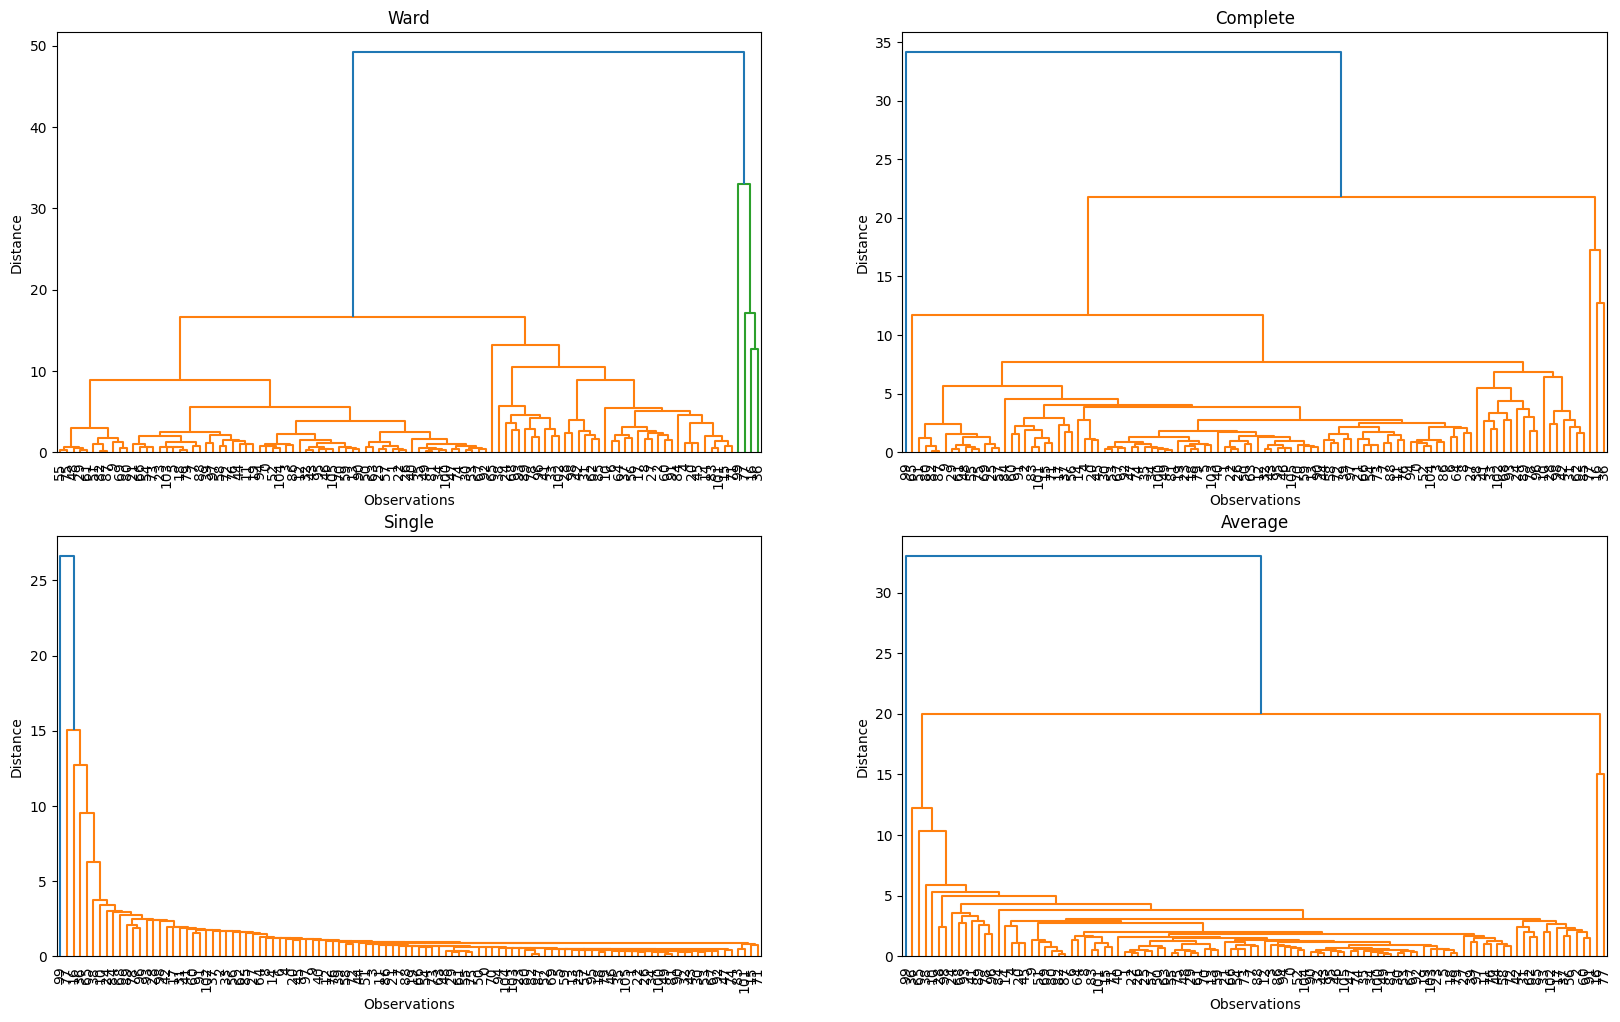

In [1096]:
plt.figure(figsize = (20, 12))

plt.subplot(221)
plt.title('Ward')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title('Complete')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title('Single')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hc_single, leaf_font_size = 10)

plt.subplot(224)
plt.title('Average')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hc_average, leaf_font_size = 10)

{'icoord': [[65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [35.0, 35.0, 53.75, 53.75],
  [25.0, 25.0, 44.375, 44.375],
  [15.0, 15.0, 34.6875, 34.6875],
  [85.0, 85.0, 95.0, 95.0],
  [24.84375, 24.84375, 90.0, 90.0],
  [5.0, 5.0, 57.421875, 57.421875]],
 'dcoord': [[0.0,
   np.float64(4.300126504913915),
   np.float64(4.300126504913915),
   0.0],
  [0.0,
   np.float64(4.942986151068335),
   np.float64(4.942986151068335),
   np.float64(4.300126504913915)],
  [0.0,
   np.float64(5.283092881138424),
   np.float64(5.283092881138424),
   np.float64(4.942986151068335)],
  [0.0,
   np.float64(5.8640824399068245),
   np.float64(5.8640824399068245),
   np.float64(5.283092881138424)],
  [0.0,
   np.float64(10.36451280964072),
   np.float64(10.36451280964072),
   np.float64(5.8640824399068245)],
  [0.0,
   np.float64(12.190970464239852),
   np.float64(12.190970464239852),
   np.float64(10.36451280964072)],
  [0.0, np.float64(15.021647857445366), np.float64(15.

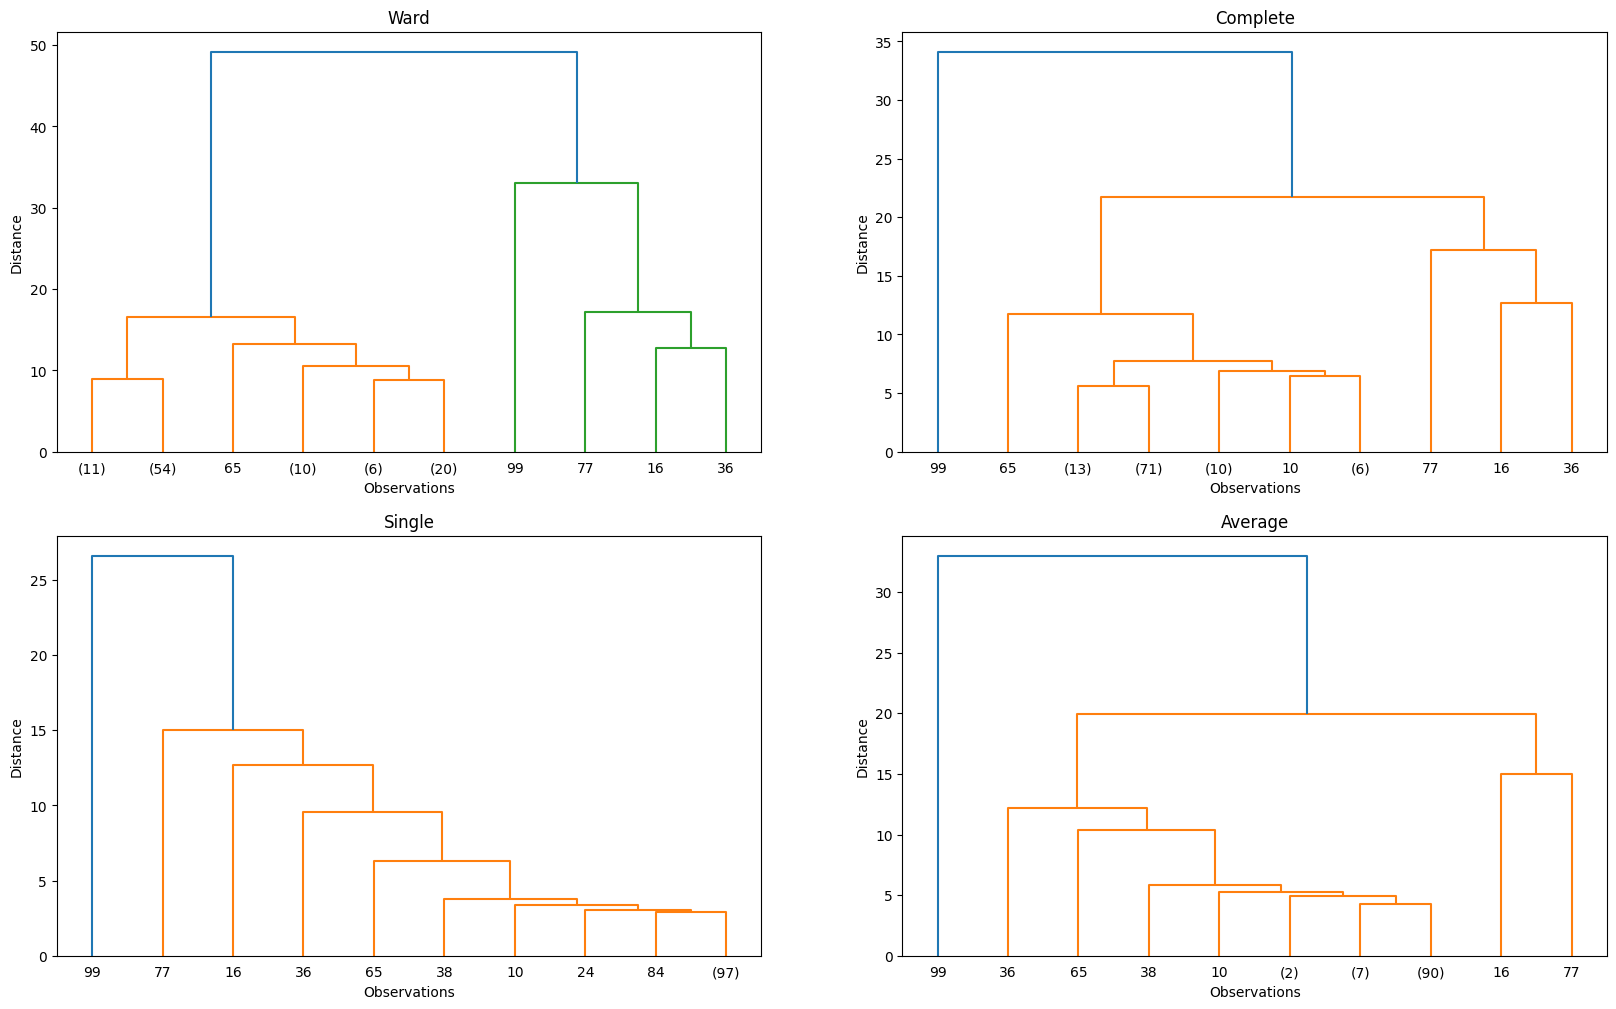

In [1097]:
plt.figure(figsize = (20, 12))

plt.subplot(221)
plt.title('Ward')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode = 'lastp', p = 10)

plt.subplot(222)
plt.title('Complete')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode = 'lastp', p = 10)

plt.subplot(223)
plt.title('Single')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hc_single, leaf_font_size = 10, truncate_mode = 'lastp', p = 10)

plt.subplot(224)
plt.title('Average')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hc_average, leaf_font_size = 10, truncate_mode = 'lastp', p = 10)

In [1098]:
from sklearn.cluster import AgglomerativeClustering

In [1099]:
from sklearn.metrics import silhouette_score

In [1100]:
for i in cluster_range:
  model = AgglomerativeClustering(n_clusters = i)
  model.fit_predict(X_scaled)
  print(f'For number of clusters: {i} the Silhouette Score is: {silhouette_score(X_scaled, model.labels_)}')

For number of clusters: 2 the Silhouette Score is: 0.8316769682458274
For number of clusters: 3 the Silhouette Score is: 0.8061810981225177
For number of clusters: 4 the Silhouette Score is: 0.7934345666812757
For number of clusters: 5 the Silhouette Score is: 0.3189123168656016
For number of clusters: 6 the Silhouette Score is: 0.3174607751361525
For number of clusters: 7 the Silhouette Score is: 0.31697966027156094
For number of clusters: 8 the Silhouette Score is: 0.31408949378612794
For number of clusters: 9 the Silhouette Score is: 0.24526101101369338


In [1101]:
model1 = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')

In [1102]:
model1.fit_predict(X_scaled)

array([4, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 4, 4, 0, 0, 1, 0, 4, 4, 0, 4,
       4, 4, 0, 4, 4, 0, 0, 4, 4, 0, 4, 0, 4, 4, 1, 0, 0, 4, 4, 0, 0, 4,
       4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 0, 4, 0, 0,
       4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 3, 0, 4, 4, 4, 4, 0, 0, 0, 4, 4,
       4, 0, 4, 0, 4, 0, 4, 4, 0, 4, 0, 2, 4, 0, 0, 4, 4, 4])

In [1103]:
df_sorted['agg_ward_predicted_clusters'] = model1.labels_

In [1104]:
model2 = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'complete')

In [1105]:
model2.fit_predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [1106]:
df_sorted['agg_complete_predicted_clusters'] = model2.labels_

In [1107]:
model3 = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'single')

In [1108]:
model3.fit_predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [1109]:
df_sorted['agg_single_predicted_clusters'] = model3.labels_

In [1110]:
model4 = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'average')

In [1111]:
model4.fit_predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [1112]:
df_sorted['agg_average_predicted_clusters'] = model4.labels_

In [1113]:
df_sorted

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Available Manpower value,Total Population value,Total Border Coverage value,Country,predicted_clusters,agg_ward_predicted_clusters,agg_complete_predicted_clusters,agg_single_predicted_clusters,agg_average_predicted_clusters
2,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157.0,20741263.0,4.165749e+07,6734.0,Algeria,0,4,0,0,0
17,0.1988,715.0,43.0,78.0,126.0,198.0,242.0,12.0,437.0,1820.0,132.0,565.0,84.0,112.0,0.0,6.0,0.0,7.0,2.780000e+10,5.474000e+11,4093.0,107764996.0,2.088469e+08,16145.0,Brazil,0,4,0,0,0
22,0.3712,385.0,62.0,0.0,38.0,135.0,145.0,0.0,80.0,1973.0,0.0,133.0,0.0,64.0,0.0,4.0,0.0,12.0,2.250000e+10,1.608000e+12,1467.0,16110865.0,3.588166e+07,8893.0,Canada,0,0,0,0,0
27,0.6045,469.0,21.0,38.0,76.0,80.0,224.0,0.0,0.0,595.0,6.0,110.0,0.0,453.0,0.0,11.0,0.0,4.0,1.060000e+10,1.246000e+11,836.0,24084498.0,4.816900e+07,6672.0,Colombia,0,4,0,0,0
35,0.1872,1054.0,215.0,88.0,59.0,387.0,294.0,81.0,4295.0,11700.0,1139.0,2189.0,1084.0,316.0,2.0,8.0,0.0,7.0,1.120000e+10,7.747000e+10,83.0,42946553.0,9.941332e+07,2612.0,Egypt,0,0,0,0,0
40,0.1702,1229.0,269.0,0.0,121.0,187.0,589.0,62.0,528.0,6028.0,109.0,12.0,13.0,180.0,4.0,9.0,11.0,11.0,4.150000e+10,5.360000e+12,464.0,30111868.0,6.736436e+07,4072.0,France,0,4,0,0,0
43,0.2186,712.0,128.0,74.0,71.0,26.0,386.0,56.0,245.0,4583.0,108.0,0.0,38.0,80.0,0.0,6.0,0.0,9.0,5.000000e+10,5.326000e+12,539.0,37010559.0,8.045774e+07,3694.0,Germany,0,0,0,0,0
45,0.5311,566.0,187.0,0.0,15.0,143.0,231.0,29.0,1355.0,3691.0,547.0,463.0,152.0,116.0,0.0,11.0,0.0,13.0,4.844000e+09,5.066000e+11,77.0,4993347.0,1.076152e+07,1110.0,Greece,0,4,0,0,0
54,0.3111,589.0,259.0,18.0,15.0,154.0,146.0,48.0,2760.0,10275.0,650.0,300.0,100.0,65.0,0.0,5.0,0.0,0.0,2.000000e+10,8.866000e+10,47.0,3647983.0,8.424904e+06,1068.0,Israel,0,0,0,0,0
73,0.6065,484.0,3.0,33.0,43.0,206.0,202.0,0.0,0.0,2199.0,0.0,265.0,0.0,189.0,0.0,0.0,0.0,4.0,7.000000e+09,4.458000e+11,1714.0,60460418.0,1.259592e+08,4389.0,Mexico,0,4,0,0,0


KMeans clustering seems to work better than hierarchical clustering

